In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17494 (from 4)
Receiving objects: 100% (17511/17511), 16.65 MiB | 14.56 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 

In [ ]:
import zipfile
import os

from google.colab import drive
drive.mount('/content/drive')

zip_path = "/content/drive/MyDrive/Colab Notebooks/Projek CV/road_damage_dataset.zip"
extract_path = "/content/dataset_kerusakan"

# Buat folder tujuan jika belum ada
os.makedirs(extract_path, exist_ok=True)

# Ekstrak
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Selesai ekstrak ke:", extract_path)

Mounted at /content/drive
✅ Selesai ekstrak ke: /content/dataset_kerusakan


In [ ]:
import os, shutil
from sklearn.model_selection import train_test_split

base_path = '/content/dataset_kerusakan/road_damage_dataset'
image_files = [f for f in os.listdir(base_path) if f.endswith('.jpeg')]

# Split train-val
train_imgs, val_imgs = train_test_split(image_files, test_size=0.2, random_state=42)

# Buat fungsi untuk memindahkan gambar + label
def move(files, img_dest, lbl_dest):
    os.makedirs(img_dest, exist_ok=True)
    os.makedirs(lbl_dest, exist_ok=True)
    for img_file in files:
        base = os.path.splitext(img_file)[0]
        txt_file = base + '.txt'

        src_img = os.path.join(base_path, img_file)
        src_txt = os.path.join(base_path, txt_file)

        dst_img = os.path.join(img_dest, img_file)
        dst_txt = os.path.join(lbl_dest, txt_file)

        if os.path.exists(src_img) and os.path.exists(src_txt):
            shutil.copy(src_img, dst_img)
            shutil.copy(src_txt, dst_txt)

# Pindah ke dataset YOLO format
move(train_imgs, '/content/dataset_kerusakan/images/train', '/content/dataset_kerusakan/labels/train')
move(val_imgs, '/content/dataset_kerusakan/images/val', '/content/dataset_kerusakan/labels/val')

In [ ]:
data_yaml = """
train: /content/dataset_kerusakan/images/train
val: /content/dataset_kerusakan/images/val
nc: 4
names: ['Pothole', 'Alligator_Crack', 'Longitudinal_Crack', 'Lateral_Crack']
"""

with open('/content/yolov5/data.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
      35/49      3.66G     0.0462    0.01833   0.003646         67        640:  20% 34/166 [00:09<00:35,  3.74it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      35/49      3.66G     0.0462    0.01836   0.003626         64        640:  21% 35/166 [00:10<00:36,  3.62it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      35/49      3.66G    0.04614    0.01826   0.003706         48        640:  22% 36/166 [00:10<00:35,  3.66it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      35/49      3.66G    0.04623 

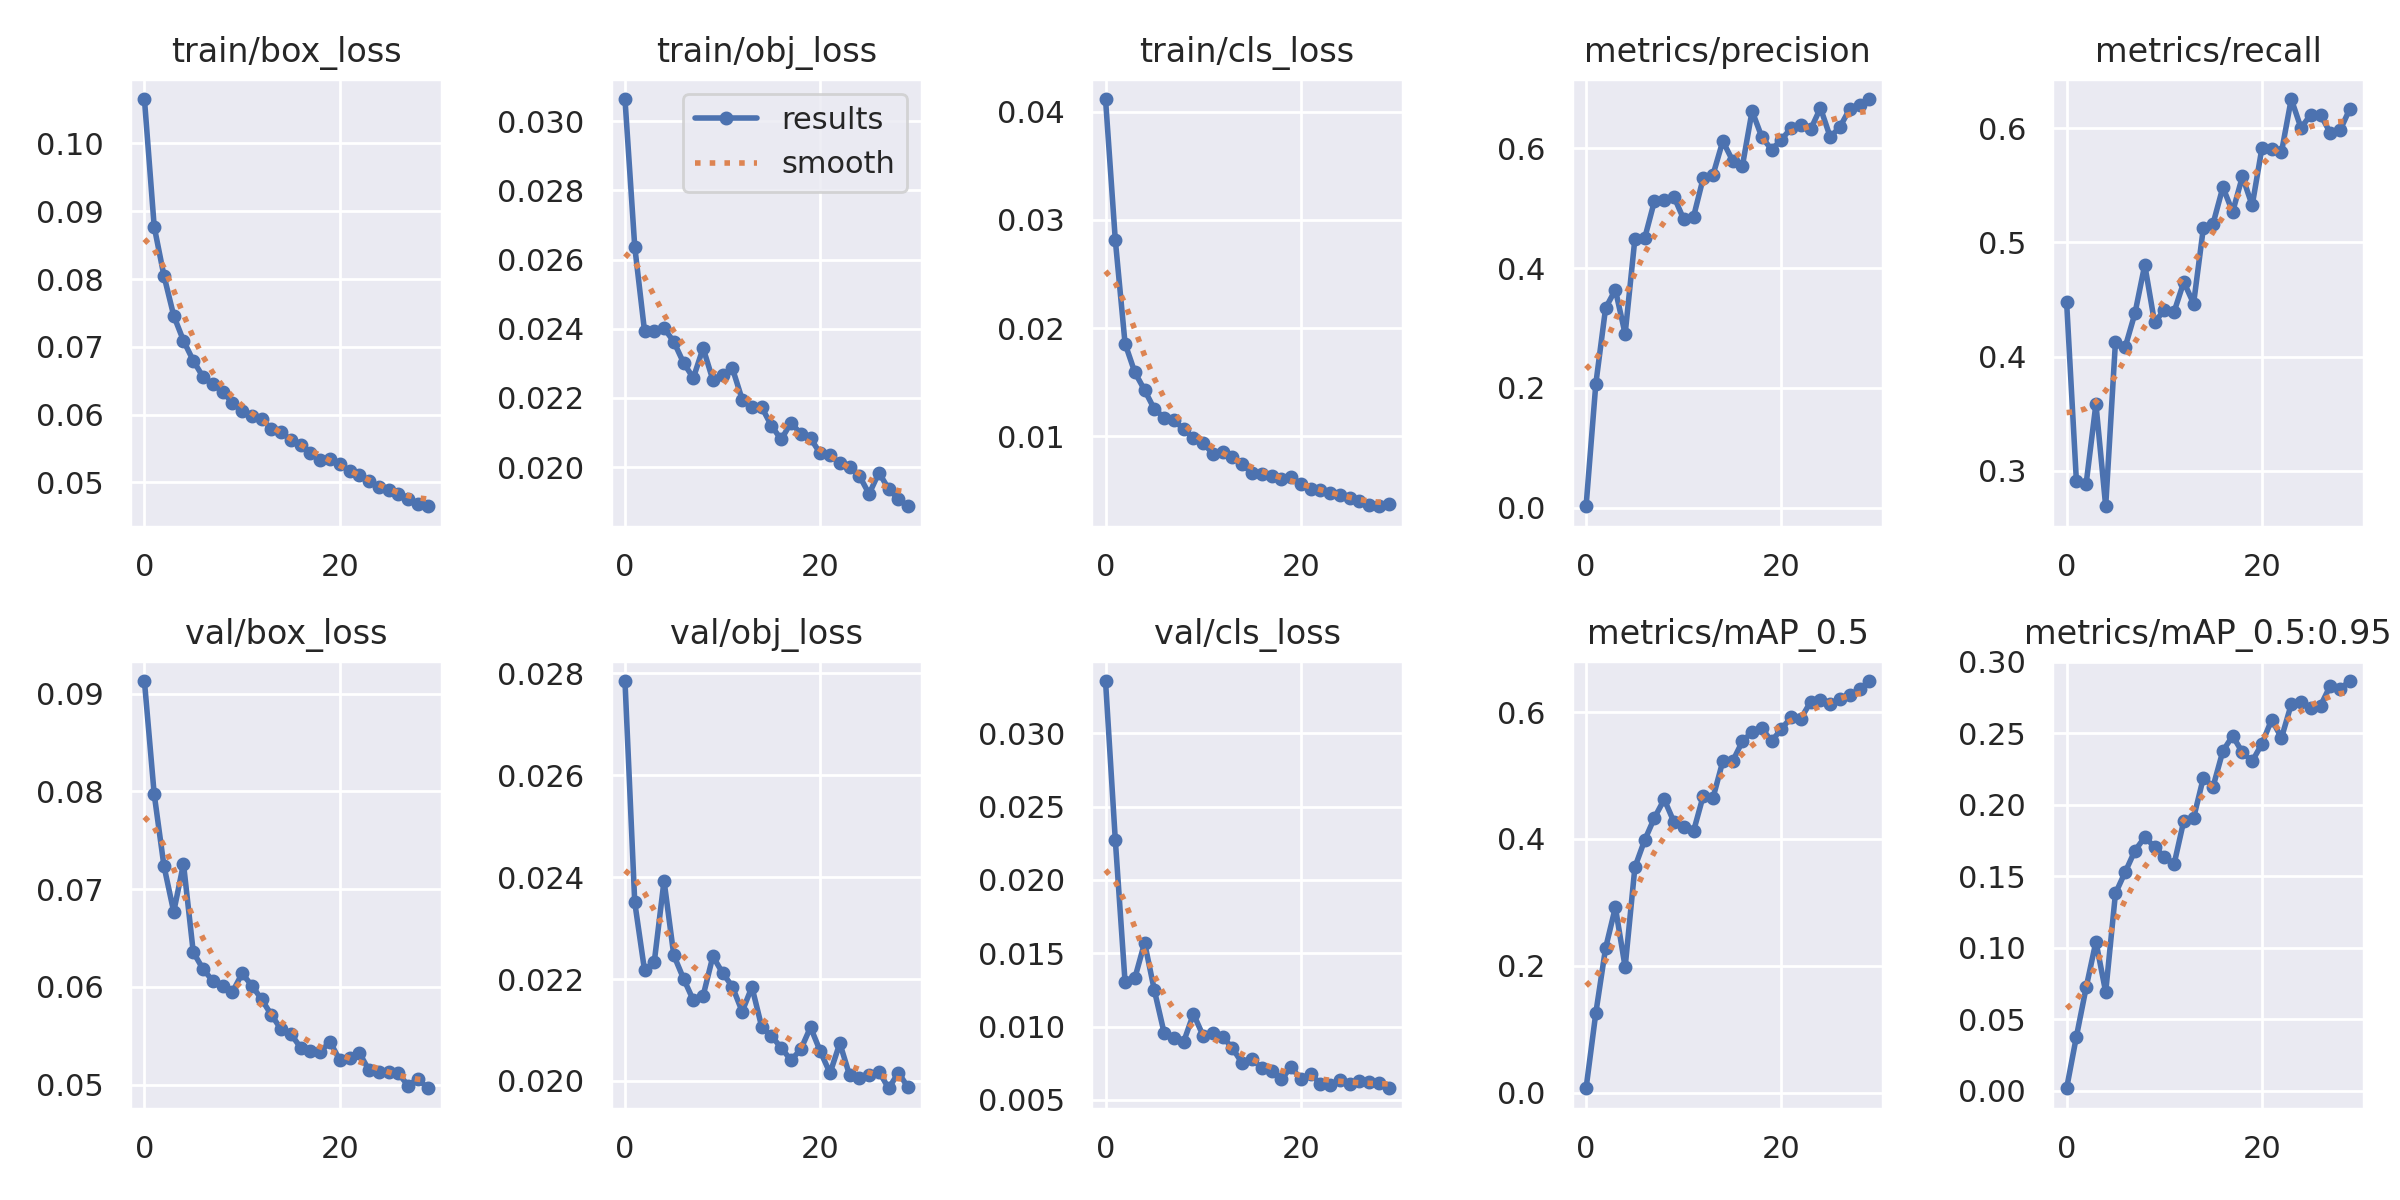

In [ ]:
from IPython.display import Image
Image(filename='runs/train/exp/results.png', width=600)

In [ ]:
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --source /content/dataset_kerusakan/road_damage_dataset/Z_430.jpeg

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/dataset_kerusakan/road_damage_dataset/Z_430.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset_kerusakan/road_damage_dataset/Z_430.jpeg: 384x640 1 Longitudinal_Crack, 30.3ms
Speed: 0.5ms pre-process, 30.3ms inference, 182.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


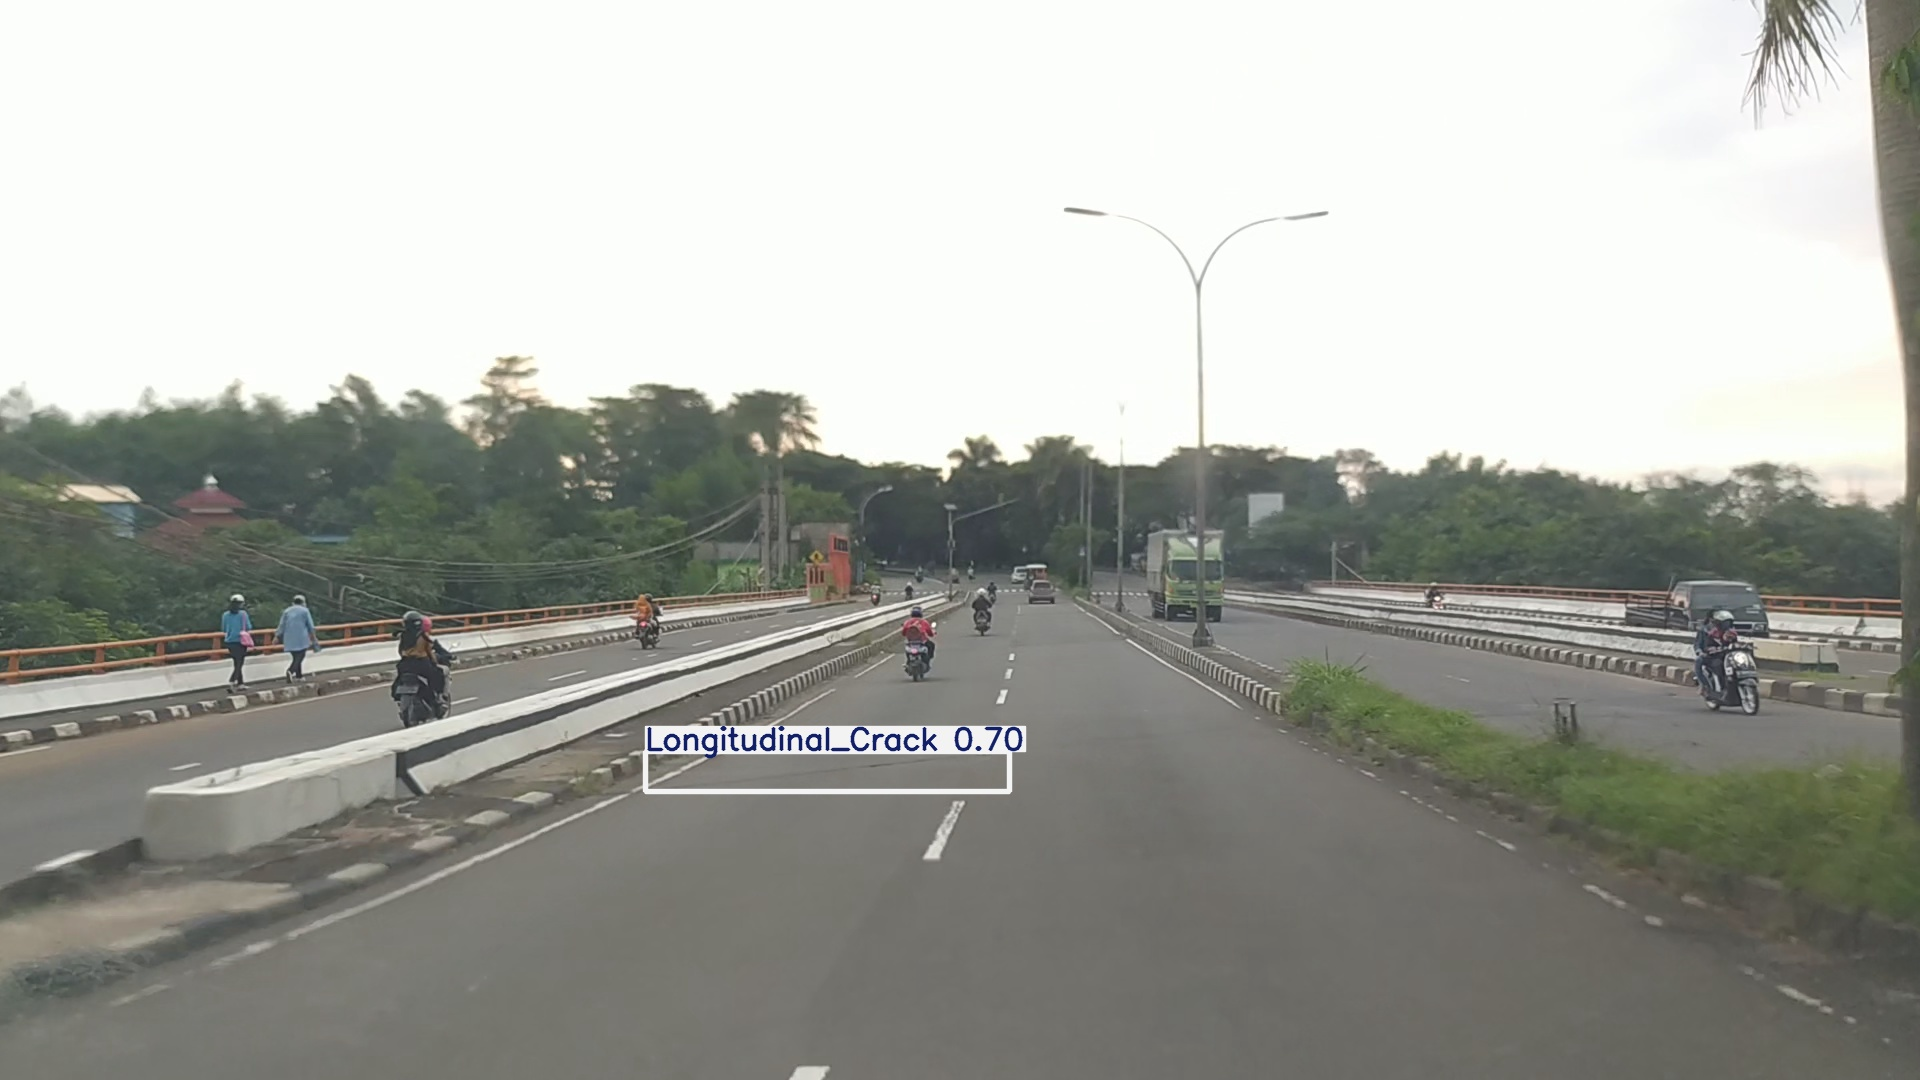

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/exp4/Z_430.jpeg', width=600)